<b>Лабораторная работа 1. Линейная регрессия и факторный анализ<b>

<b>1. Цель работы: изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качества.<b>

<b>2. Описание датасета. Опишите рассматриваемый датасет, покажите графики распределения признаков и корреляционную матрицу.<b>


Этот набор данных относится к  вариантам белого португальского вина "Винью Верде". Из-за проблем конфиденциальности и логистики доступны только физико-химические (входные данные) и сенсорные (выходные данные) переменные (например, отсутствуют данные о сортах винограда, марке вина, отпускной цене вина и т.д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии.


Входные переменные (на основе физико-химических тестов):

1.  fixed acidity (фиксированная кислотность)
2.  volatile acidity (летучая кислотность)
3.  citric acid (лимонная кислота)
4.  residual sugar (остаточный сахар)
5.  chlorides (хлориды)
6.  free sulfur dioxide (свободный диоксид серы)
7.  total sulfur dioxide (общий диоксид серы)
8.  density (плотность)
9.  pH
10. sulphates (сульфаты)
11. alcohol (спирт)


Выходные данные (на основе сенсорных данных):

12. quality (качество - оценка от 0 до 10)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Ниже описан код для загрузки датасета, вывода основной информации о данных: размер датасета, первые строки, объем выборки, среднее, стандартное отклонение, минимальное значение, медиана, 1-я и 3-я четверть данных (25% и 75%), количество пропусков данных и информация о значениях ассиметрии и эксцесса каждого из параметров.

Также представлены гистограммы распределения признаков и корелляционная матрица (heatmap).

Размер датасета: (4898, 12)

Первые строки:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6
4            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40   

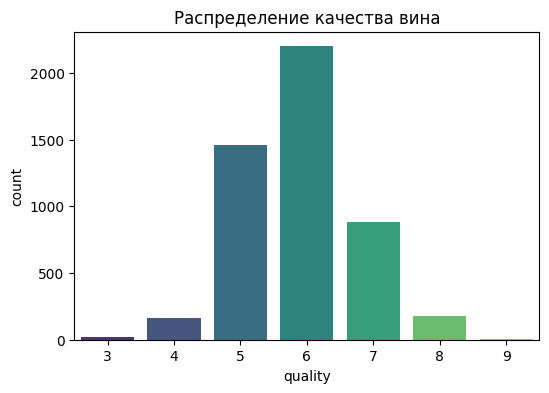

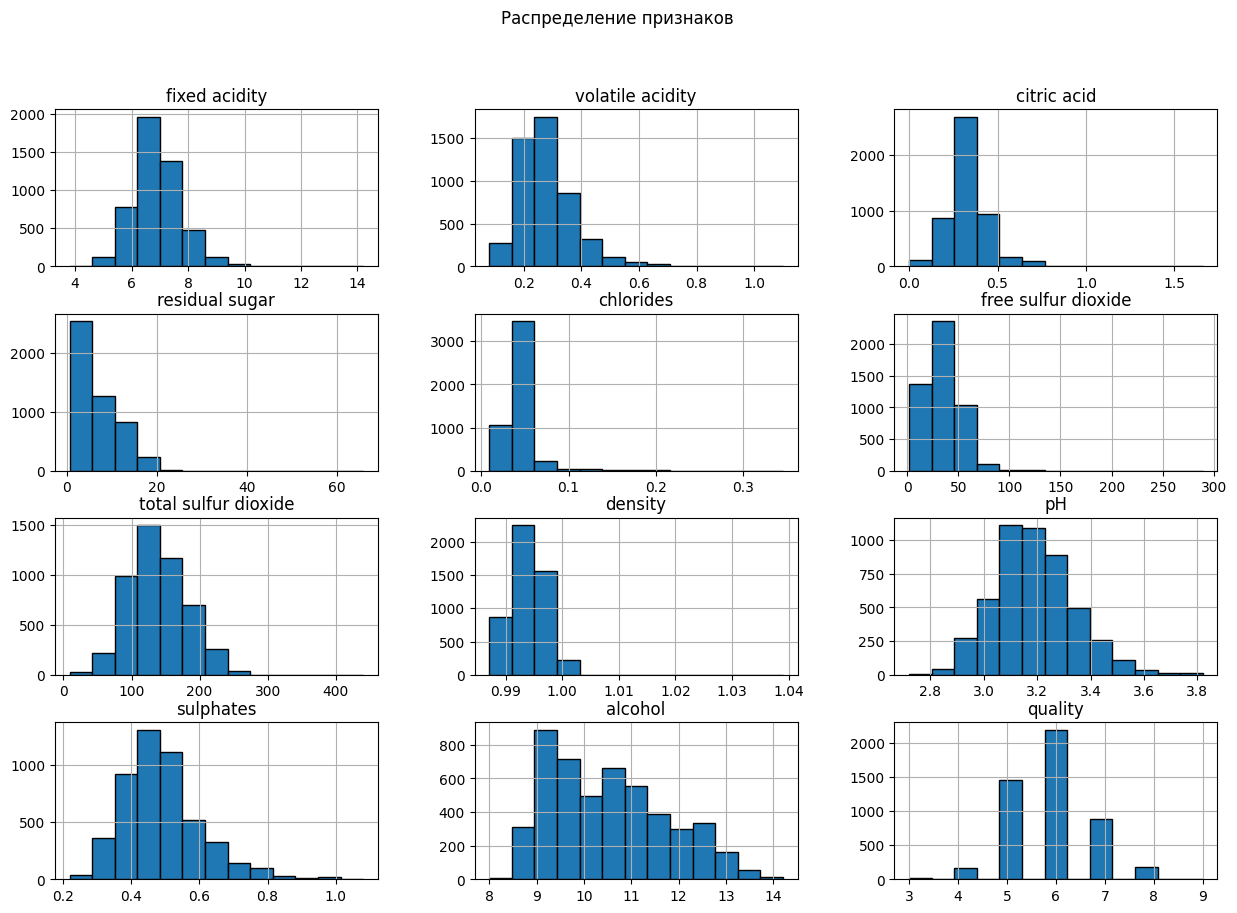

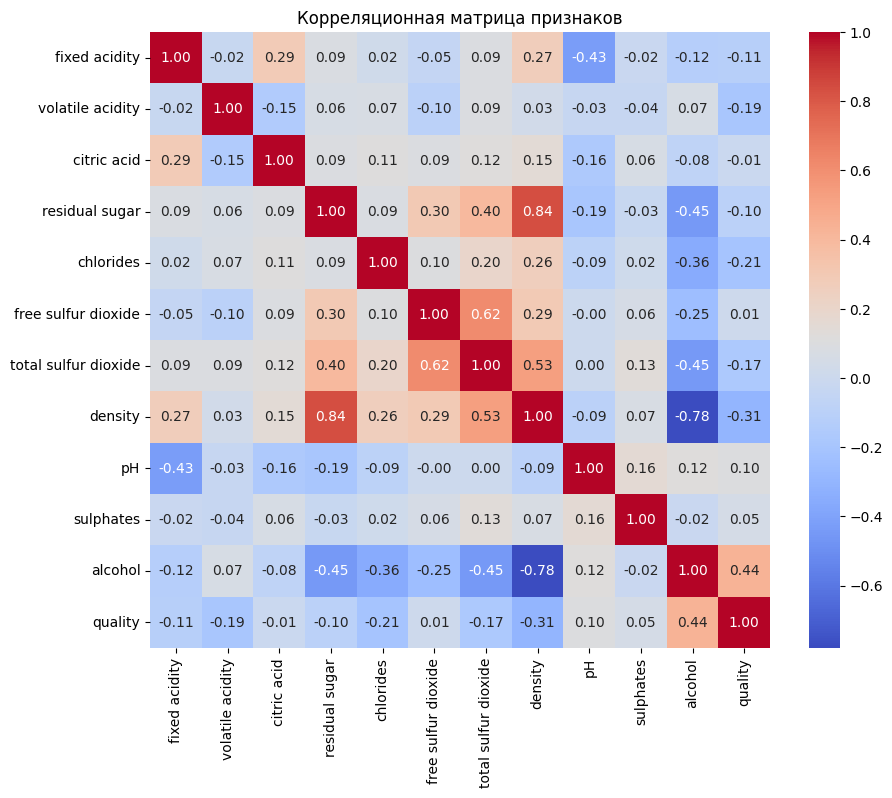

In [29]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
import numpy as np

df = pd.read_csv("winequality-white.csv", sep=";")

print("Размер датасета:", df.shape)
print("\nПервые строки:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОписание признаков:")
print(df.describe())

print("\nКоличество пропусков:")
print(df.isnull().sum())

numeric_columns = df.select_dtypes(include=[np.number]).columns

data = {
    'Параметр': [],
    'Асимметрия': [],
    'Эксцесс': []
}

for col in numeric_columns:
    skew_val = skew(df[col].dropna())
    kurt_val = kurtosis(df[col].dropna())
    data['Параметр'].append(col)
    data['Асимметрия'].append(skew_val)
    data['Эксцесс'].append(kurt_val)

summary_df = pd.DataFrame(data)
print(summary_df)

plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Распределение качества вина")
plt.show()

count_of_bins = int(1 + 3.322*math.log10(df.shape[0]))

df.hist(bins=count_of_bins, figsize=(15,10), edgecolor="black")
plt.suptitle("Распределение признаков")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица признаков")
plt.show()

Признаки с относительно нормальным распределением:
* quality (асимметрия 0.16, эксцесс 0.22) - наиболее нормальное распределение

* total sulfur dioxide (асимметрия 0.39, эксцесс 0.57)

* pH (асимметрия 0.46, эксцесс 0.53)

* alcohol (асимметрия 0.49, эксцесс -0.70)

Признаки с умеренными отклонениями:
* fixed acidity (асимметрия 0.65) - правостороннее смещение

* residual sugar (асимметрия 1.08) - сильное правостороннее смещение



Проблемные признаки с сильными отклонениями:
* chlorides (асимметрия 5.02, эксцесс 37.53) - экстремальные значения

* free sulfur dioxide (эксцесс 11.45) - очень островершинное распределение

* volatile acidity (асимметрия 1.58)

* citric acid (асимметрия 1.28)

* density (эксцесс 9.78)

Критические выбросы:

* residual sugar: max 65.8 vs 75% 9.9 (более чем в 6 раз)

* chlorides: max 0.346 vs 75% 0.05 (почти в 7 раз)

* free sulfur dioxide: max 289 vs 75% 46 (в 6 раз)

* alcohol: разброс от 8.0 до 14.2

Сильные корреляции (> |0.7|):
* density & residual sugar: 0.84 - очень сильная положительная

* density & alcohol: -0.78 - очень сильная отрицательная

* total sulfur dioxide & free sulfur dioxide: 0.62 - сильная положительная

Умеренные корреляции (|0.3|-|0.7|):
* alcohol & quality: 0.44 - умеренная положительная

* density & total sulfur dioxide: 0.53

* residual sugar & total sulfur dioxide: 0.40

<b>3. Подготовка данных. Подробно изложите процедуры предобработки данных (нормализация, заполнение пропусков, разделение выборки на train/test).<b>

В датасете нет пропущенных значений — все столбцы содержат данные для всех 4898 строк. Это означает, что удаление/заполнение пропусков не требуется.

Категориальных переменных в датасете нет; все признаки числовые, так что кодировать что-либо не нужно.

Разделять выборку на train/test в дальнейшем будем с помощью train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* test_size=0.2 - 20% данных для теста, 80% для обучения

* random_state=42 - фиксирует случайность для воспроизводимости

Для дальнейшего анализа следует произвести нормализацию данных через StandartScaler. 

После нормализации рассчитаем значение коэффициента VIF (Variance Inflation Factor) для получения информации о мультиколлинеарности данных.

In [20]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop("quality", axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["Переменная"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

              Переменная        VIF
7                density  28.232546
3         residual sugar  12.644064
10               alcohol   7.706957
0          fixed acidity   2.691435
6   total sulfur dioxide   2.239233
8                     pH   2.196362
5    free sulfur dioxide   1.787880
4              chlorides   1.236822
2            citric acid   1.165215
1       volatile acidity   1.141156
9              sulphates   1.138540


Хорошие значения (отсутствие проблем):

—VIF = 1 — идеальное значение, указывающее на полное отсутствие корреляции между данным предиктором и остальными переменными
—VIF 1-5 — отсутствие мультиколлинеарности, умеренный уровень корреляции, не вызывающий беспокойства

Пограничные значения (требуют внимания):

—VIF 5-10 — умеренная мультиколлинеарность, которая может потребовать дальнейшего исследования

Плохие значения (серьезные проблемы):

—VIF > 10 — признак серьезной мультиколлинеарности, требующей коррекции
 VIF > 10 означает, что R^2>0.9, то есть более 90% вариации данного предиктора объясняется другими переменными

В текущих данных:

* residual sugar (остаточный сахар) → 12.64 (сильная мультиколлинеарность)

* density (плотность) → 28.23 (очень сильная мультиколлинеарность)

* alcohol (спирт) → 7.71 (умеренная мультиколлинеарность)

* Остальные — в пределах нормы (1–3).

density (плотность) очень сильно коррелирует с residual sugar (остаточный сахар) и alcohol (спирт) - это видно по матрице корреляции. Это ожидаемо: плотность (осязание «тела») вина зависит от содержания алкоголя и концентрации сахаров.

residual sugar (остаточный сахар) же и alcohol (спирт) тоже частично пересекаются в информации, так как сахар играет ключевую роль в содержания алкоголя в вине, являясь основным сырьем для производства этилового спирта в процессе ферментации.

<b>4. Ход работы. 
* Построить регрессионные модели (линейная и гребневая). Если целевая переменная - категориальная, то исследовать логистическую регрессию. Разделить на тренировочную и тестовую выборки (80/20 или 70/30). Использовать кросс-валидацию. Оценить качество построенной модели с помощью метрик: RMSE (Root Mean Square Error), R² (коэффициент детерминации) и MAPE (Mean Absolute Percentage Error).

* Устранить мультиколлинеарность и снизить размерность признаков с помощью метода главных компонент (PCA).

* Повторить шаг построения модели (линейная и гребневая регрессия), но использовать в качестве признаков не исходные данные, а главные компоненты. Сравнить метрики качества (RMSE, R² и MAPE) моделей, обученных на исходных данных и на главных компонентах.<b>

Тестовая и тренировочная 80/20
Линейная регрессия:
  RMSE: 0.754
  R^2: 0.265
  MAPE: 10.326%

Уравнение линейной регрессии:
quality = (0.0388)*fixed acidity + (-0.1945)*volatile acidity + (-0.0073)*citric acid + (0.3661)*residual sugar + (-0.0006)*chlorides + (0.0854)*free sulfur dioxide + (-0.0102)*total sulfur dioxide + (-0.3754)*density + (0.0902)*pH + (0.0737)*sulphates + (0.2812)*alcohol + (5.8714)

Гребневая регрессия:
  RMSE: 0.763
  R^2: 0.248
  MAPE: 10.467%

Уравнение гребневой регрессии:
quality = (0.0316)*fixed acidity + (-0.1946)*volatile acidity + (-0.0075)*citric acid + (0.3448)*residual sugar + (-0.0022)*chlorides + (0.0865)*free sulfur dioxide + (-0.0117)*total sulfur dioxide + (-0.3449)*density + (0.0844)*pH + (0.0719)*sulphates + (0.2933)*alcohol + (5.8714)

K-блочная кросс-валидация (5 фолдов)
Фолд 1: R^2 линейной регрессии = 0.265, R^2 гребневой регрессии = 0.248
Фолд 2: R^2 линейной регрессии = 0.284, R^2 гребневой регрессии = 0.281
Фолд 3: R^2 линейной регрессии

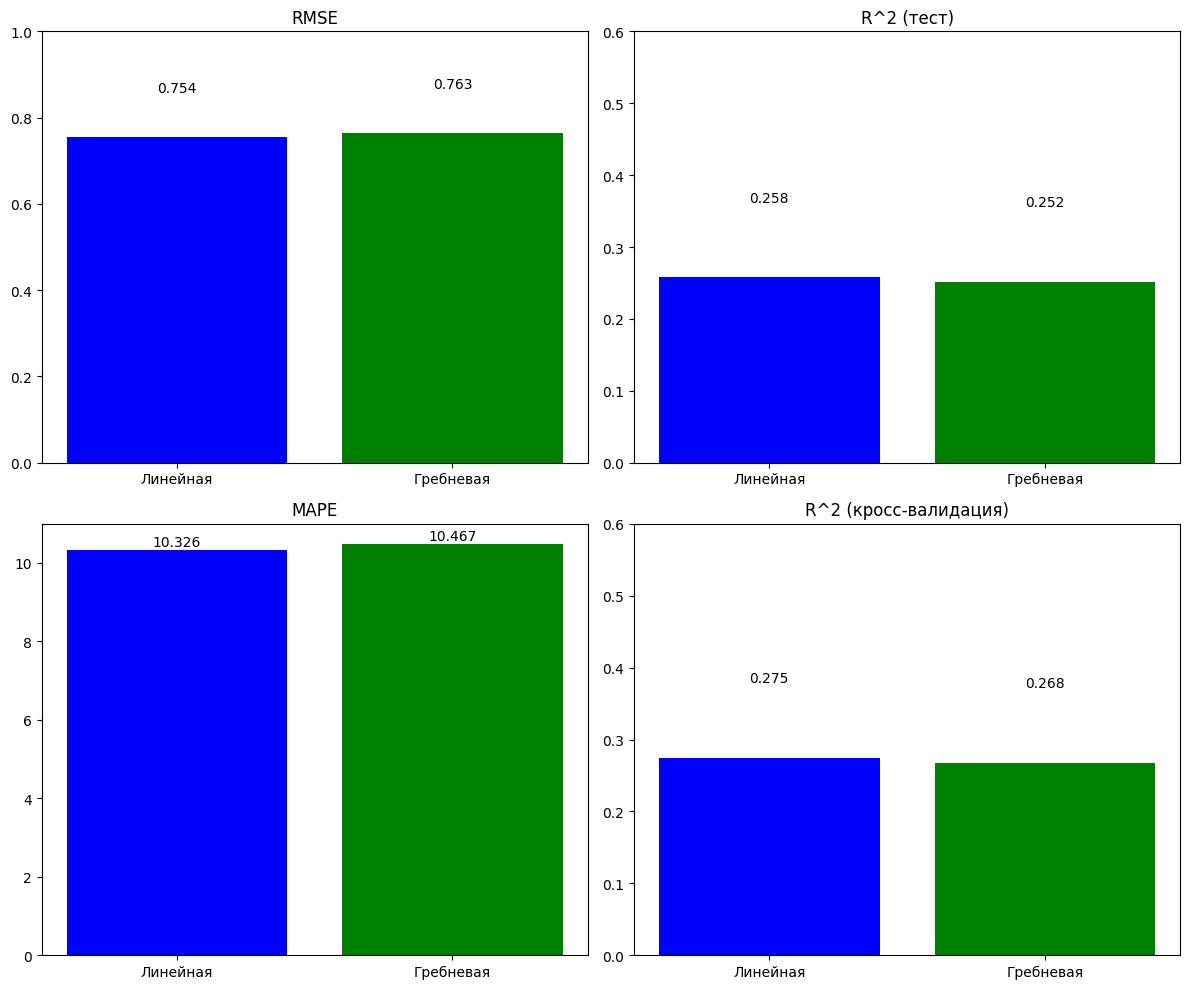

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


X = data.drop(columns=['quality'])
y = data['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)


rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)
mape_lin = mean_absolute_percentage_error(y_test, y_pred_lin) * 100

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100


feature_names = X.columns.tolist()

print('Тестовая и тренировочная 80/20')

print('Линейная регрессия:')
print(f'  RMSE: {rmse_lin:.3f}')
print(f'  R^2: {r2_lin:.3f}')
print(f'  MAPE: {mape_lin:.3f}%')


lr_equation = "quality = "
lr_equation += " + ".join([f"({lr.coef_[i]:.4f})*{col}" for i, col in enumerate(feature_names)])
lr_equation += f" + ({lr.intercept_:.4f})"
print("\nУравнение линейной регрессии:")
print(lr_equation)

print('\nГребневая регрессия:')
print(f'  RMSE: {rmse_ridge:.3f}')
print(f'  R^2: {r2_ridge:.3f}')
print(f'  MAPE: {mape_ridge:.3f}%')

ridge_equation = "quality = "
ridge_equation += " + ".join([f"({best_ridge.coef_[i]:.4f})*{col}" for i, col in enumerate(feature_names)])
ridge_equation += f" + ({best_ridge.intercept_:.4f})"
print("\nУравнение гребневой регрессии:")
print(ridge_equation)
print()

print('K-блочная кросс-валидация (5 фолдов)')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores_lin = []
r2_scores_ridge = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model_lin_fold = LinearRegression()
    model_lin_fold.fit(X_train_fold, y_train_fold)
    y_pred_lin_fold = model_lin_fold.predict(X_test_fold)
    r2_lin = r2_score(y_test_fold, y_pred_lin_fold)
    r2_scores_lin.append(r2_lin)

    model_ridge_fold = Ridge(alpha=1.0)
    model_ridge_fold.fit(X_train_fold, y_train_fold)
    y_pred_ridge_fold = model_ridge_fold.predict(X_test_fold)
    r2_ridge = r2_score(y_test_fold, y_pred_ridge_fold)
    r2_scores_ridge.append(r2_ridge)

    print(f'Фолд {fold}: R^2 линейной регрессии = {r2_lin:.3f}, R^2 гребневой регрессии = {r2_ridge:.3f}')

print(f'\nСреднее R^2 линейной регрессии: {np.mean(r2_scores_lin):.3f}')
print(f'Среднее R^2 гребневой регрессии: {np.mean(r2_scores_ridge):.3f}')

metrics_names = ['RMSE', 'R^2 (тест)', 'MAPE', 'R^2 (кросс)']

lin_metrics = [rmse_lin, r2_lin, mape_lin, np.mean(r2_scores_lin)]
ridge_metrics = [rmse_ridge, r2_ridge, mape_ridge, np.mean(r2_scores_ridge)]

x = np.arange(1)
width = 0.35

fig, axs = plt.subplots(2, 2, figsize=(12, 10))


axs[0, 0].bar(['Линейная', 'Гребневая'], [rmse_lin, rmse_ridge], color=['blue', 'green'])
axs[0, 0].set_title('RMSE')


axs[0, 1].bar(['Линейная', 'Гребневая'], [r2_lin, r2_ridge], color=['blue', 'green'])
axs[0, 1].set_title('R^2 (тест)')


axs[1, 0].bar(['Линейная', 'Гребневая'], [mape_lin, mape_ridge], color=['blue', 'green'])
axs[1, 0].set_title('MAPE')


axs[1, 1].bar(['Линейная', 'Гребневая'], [np.mean(r2_scores_lin), np.mean(r2_scores_ridge)], color=['blue', 'green'])
axs[1, 1].set_title('R^2 (кросс-валидация)')

axs[0, 0].set_ylim([0, 1.0])       
axs[0, 1].set_ylim([0, 0.6])               
axs[1, 1].set_ylim([0, 0.6]) 


for ax in axs.flat:
    for i, v in enumerate([rmse_lin, rmse_ridge] if ax == axs[0, 0] else
                          [r2_lin, r2_ridge] if ax == axs[0, 1] else
                          [mape_lin, mape_ridge] if ax == axs[1, 0] else
                          [np.mean(r2_scores_lin), np.mean(r2_scores_ridge)]):
        ax.text(i, v + 0.01 * max(max(lin_metrics), max(ridge_metrics)), f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()




* Оба алгоритма показывают похожие результаты, что говорит о линейной зависимости умеренной силы между признаками и целевой переменной (quality).
* Значение R² ≈ 0.26 означает, что модель объясняет около 26% дисперсии качества вина. Это довольно скромный показатель — большая часть вариации качества зависит от факторов, не учтённых в модели (например, сорт винограда, технология производства и т.д.).
* RMSE ≈ 0.75 говорит, что среднее отклонение предсказания от истинного качества составляет примерно 0.75. Это означает, что в среднем прогноз отклоняется от истинного значения на 0.75 в единицах оценки качества. Это достаточно умеренная ошибка с учетом шкалы качества (в целом от 3 до 9).
* MAPE ≈ 10% указывает на среднюю относительную ошибку порядка 10%, что считается приемлемым уровнем точности для задач с реальными данными, но не выдающимся.

-----------------------------------------------------------

* Гребневая регрессия (Ridge) даёт немного более устойчивые, но чуть менее точные результаты на тесте.
Это ожидаемо: гребневая регрессия добавляет регуляризацию (штраф на большие коэффициенты), что снижает переобучение, но может немного ухудшать точность на конкретной выборке.
* Разница в R² между моделями мала (≈ 0.02), значит, регуляризация почти не улучшила обобщающую способность.

-----------------------------------------------------------

K-блочная кросс-валидация (5 фолдов)
- Фолд 1: R^2 линейной регрессии = 0.265, R^2 гребневой регрессии = 0.248
- Фолд 2: R^2 линейной регрессии = 0.284, R^2 гребневой регрессии = 0.281
- Фолд 3: R^2 линейной регрессии = 0.262, R^2 гребневой регрессии = 0.252
- Фолд 4: R^2 линейной регрессии = 0.305, R^2 гребневой регрессии = 0.308
- Фолд 5: R^2 линейной регрессии = 0.258, R^2 гребневой регрессии = 0.252

- Среднее R^2 линейной регрессии: 0.275
- Среднее R^2 гребневой регрессии: 0.268

Разброс значений R² невелик (от 0.25 до 0.31), что свидетельствует о стабильности моделей на разных подвыборках.
Средние значения R² практически совпадают с результатами теста (0.26–0.27) → модель не переобучена, поведение консистентно на новых данных.
Ridge чуть стабильнее (меньше колебания между фолдами), но улучшение минимальное.

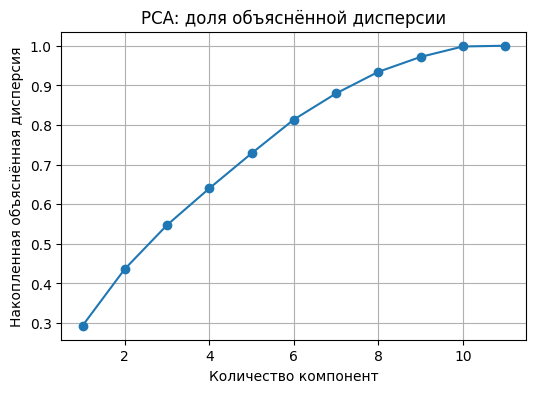

Исходное число признаков: 11
После PCA: 9

Линейная регрессия после PCA:
RMSE: 0.7643999867665072
R²: 0.24554214670289687
MAPE: 10.450

Гребневая-регрессия после PCA:
RMSE: 0.7642959451185978
R²: 0.24574750959603442
MAPE: 10.450

Фолд 1: R² линейной регрессии = 0.246
Фолд 2: R² линейной регрессии = 0.281
Фолд 3: R² линейной регрессии = 0.249
Фолд 4: R² линейной регрессии = 0.309
Фолд 5: R² линейной регрессии = 0.248
Средний R² линейной регрессии после PCA: 0.267
Фолд 1: R² гребневой регрессии = 0.246
Фолд 2: R² гребневой регрессии = 0.281
Фолд 3: R² гребневой регрессии = 0.249
Фолд 4: R² гребневой регрессии = 0.309
Фолд 5: R² гребневой регрессии = 0.249
Средний R² гребневой регрессии после PCA: 0.267


In [90]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop("quality", axis=1)
y = df["quality"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker="o")
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная объяснённая дисперсия")
plt.title("PCA: доля объяснённой дисперсии")
plt.grid()
plt.show()


pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)

print("Исходное число признаков:", X.shape[1])
print("После PCA:", X_reduced.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("\nЛинейная регрессия после PCA:")
print("RMSE:", rmse)
print("R²:", r2)
print(f"MAPE: {mape:.3f}")

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_r = r2_score(y_test, y_pred_ridge)
mape_r = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100

print("\nГребневая-регрессия после PCA:")
print("RMSE:", rmse_r)
print("R²:", r2_r)
print(f"MAPE: {mape_r:.3f}")

print()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores_lin_pca = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_reduced), 1):
    X_train_cv, X_val_cv = X_reduced[train_idx], X_reduced[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
    model_cv = LinearRegression()
    model_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = model_cv.predict(X_val_cv)
    r2_cv = r2_score(y_val_cv, y_pred_cv)
    r2_scores_lin_pca.append(r2_cv)
    print(f'Фолд {fold}: R² линейной регрессии = {r2_cv:.3f}')

print(f'Средний R² линейной регрессии после PCA: {np.mean(r2_scores_lin_pca):.3f}')

r2_scores_ridge_pca = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_reduced), 1):
    X_train_cv, X_val_cv = X_reduced[train_idx], X_reduced[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
    model_ridge_cv = Ridge(alpha=10)
    model_ridge_cv.fit(X_train_cv, y_train_cv)
    y_pred_ridge_cv = model_ridge_cv.predict(X_val_cv)
    r2_ridge_cv = r2_score(y_val_cv, y_pred_ridge_cv)
    r2_scores_ridge_pca.append(r2_ridge_cv)
    print(f'Фолд {fold}: R² гребневой регрессии = {r2_ridge_cv:.3f}')

print(f'Средний R² гребневой регрессии после PCA: {np.mean(r2_scores_ridge_pca):.3f}')

Для PCA выбрано 9 компонент, так как на графике видно, что после 9 компонент накопленная объяснённая дисперсия достигает около 95% (0.95–0.96), а на 10–11 компонентах кривая почти выходит на плато, прирост информации минимален.

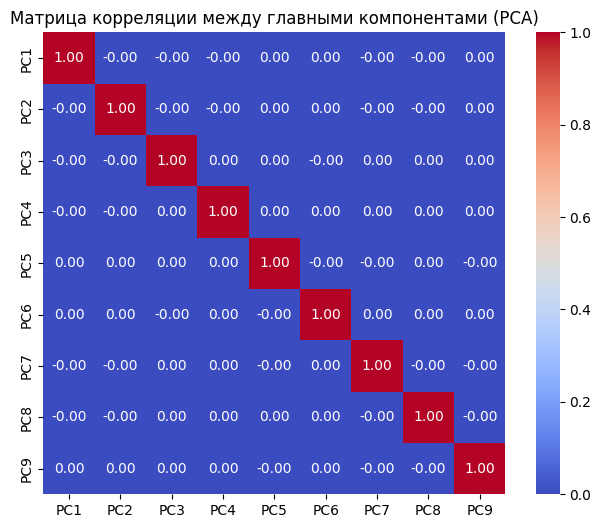

In [95]:
pca_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])])

corr_matrix = pca_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Матрица корреляции между главными компонентами (PCA)")
plt.show()

По матрице корреляции видно, что после метода главных компонент PCA мультиколлинеарность была устранена.

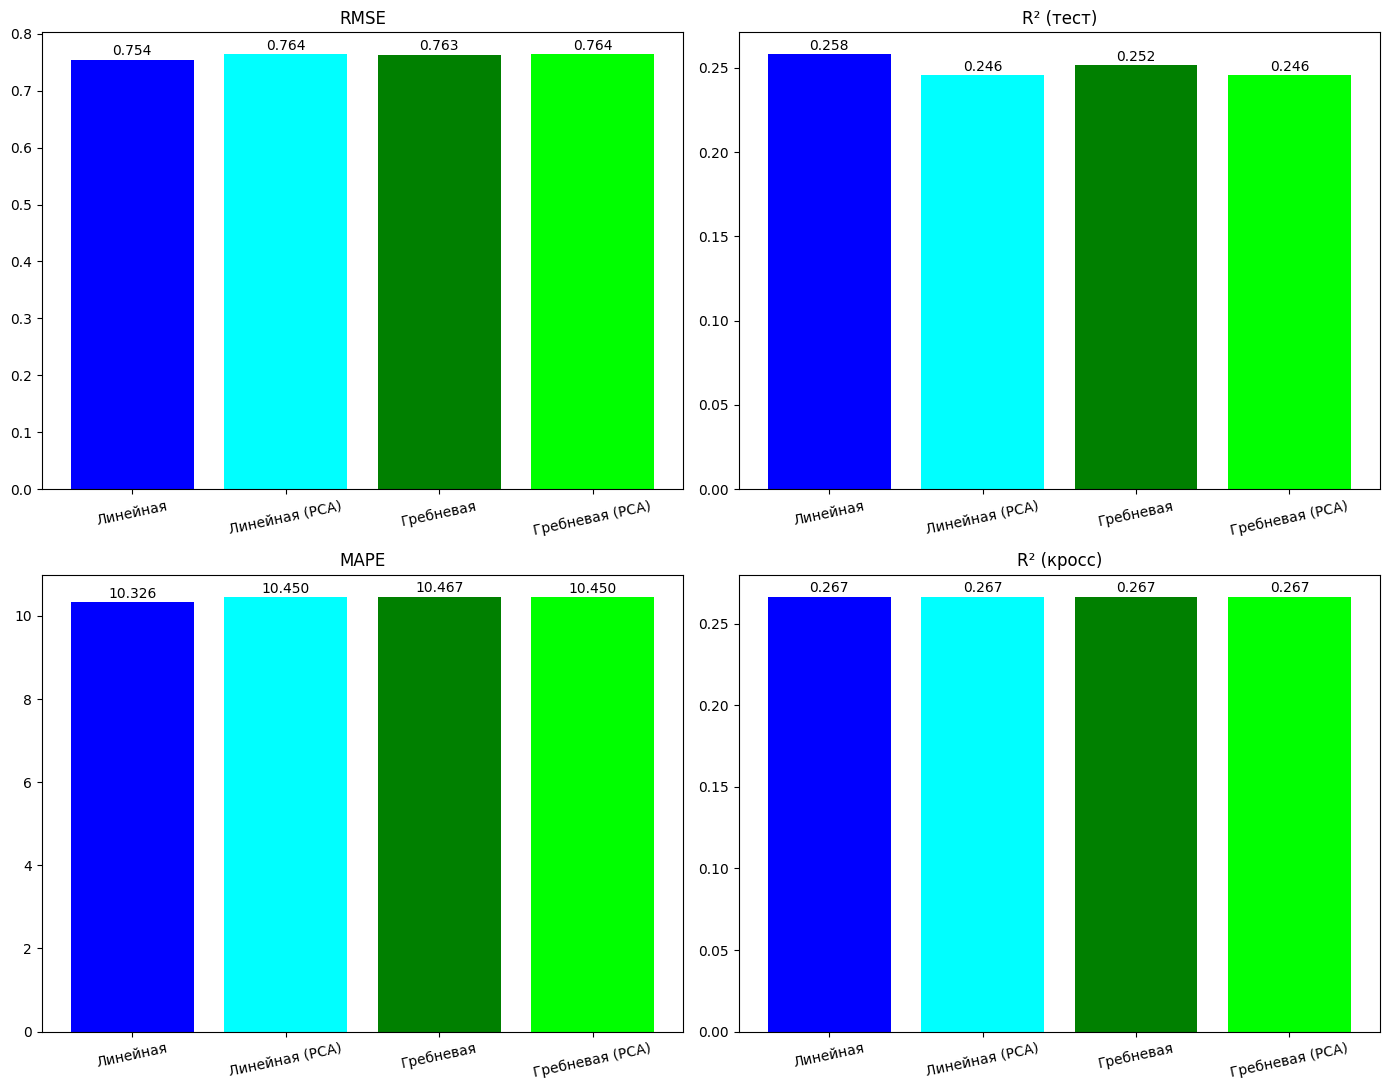

In [92]:
metrics_names = ["RMSE", "R² (тест)", "MAPE", "R² (кросс)"]


lin_metrics_before = [rmse_lin, r2_lin, mape_lin, np.mean(r2_scores_lin)]
ridge_metrics_before = [rmse_ridge, r2_ridge, mape_ridge, np.mean(r2_scores_ridge)]

lin_metrics_pca = [rmse, r2, mape, np.mean(r2_scores_lin_pca)]
ridge_metrics_pca = [rmse_r, r2_r, mape_r, np.mean(r2_scores_ridge_pca)]

n_groups = len(metrics_names)
bar_width = 0.2
x = np.arange(n_groups)

fig, axs = plt.subplots(2, 2, figsize=(14, 11))


labels = ["Линейная", "Линейная (PCA)", "Гребневая", "Гребневая (PCA)"]

for i, (ax, metric_name) in enumerate(zip(axs.flat, metrics_names)):
    values = [
        lin_metrics_before[i],   
        lin_metrics_pca[i],      
        ridge_metrics_before[i], 
        ridge_metrics_pca[i]     
    ]
    colors = ['blue', 'aqua', 'green', 'lime']
    bars = ax.bar(np.arange(4), values, color=colors)
    ax.set_title(metric_name)
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(labels, rotation=12)
    for j, rect in enumerate(bars):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.01*max(values), f"{values[j]:.3f}", ha="center")

plt.tight_layout()
plt.show()

После PCA качество моделей практически не изменилось: R² упал незначительно (≈ 0.02), а RMSE и MAPE остались на том же уровне.
Это означает, что основная информация о данных была сохранена, и удалённые 2 компоненты не вносили существенного вклада в предсказание.
Поскольку PCA устраняет корреляции, модель становится более устойчива и менее чувствительна к шуму в исходных данных.

----------------------------------------------------------------------------------------
Интерпретация значений кросс-валидации:

* Средние значения R² (≈ 0.27) идентичны результатам до PCA.
* Разброс значений по фолдам умеренный (0.24–0.31) → модель стабильна на разных подвыборках.
* Ridge и Linear дают одинаковый результат, что говорит о том, что регуляризация уже не оказывает значимого эффекта после устранения коррелированных признаков.

<b>5. Заключение. Сделайте вывод о результатах работы.<b>

Анализ характеристик качества белого вина показал, что на итоговую оценку сильнее всего влияет уровень алкоголя, далее по значимости идут плотность, остаточный сахар и параметры содержания диоксида серы, при этом у алкоголя отмечается устойчивая положительная связь с качеством, а высокая плотность создает мультиколлинеарность с другими переменными, что затрудняет интерпретацию и требует регуляризации. По ключевым метрикам средние значения для моделей регрессии составили: RMSE (среднеквадратичная ошибка) около 0.75, MAPE (средняя абсолютная процентная ошибка) примерно 10–10.5%, R^2 на тестовой выборке — 0.26–0.27, а усредненный R^2 по кросс-валидации — 0.27 для линейной и 0.27 для Ridge-регрессии; аналогичные значения для моделей с PCA: RMSE ~0.76, MAPE ~10.45%, R^2 ~0.25. Это говорит о том, что даже при использовании регуляризации и снижения размерности точность моделей ограничена умеренной объясняющей способностью химических признаков, а достичь более высокого прогноза возможно только с учётом органолептических (осязательных) характеристик или расширением набора признаков. 

<b>6. Список источников.<b>

1. Информация о датасете и сам датасет - https://www.kaggle.com/datasets/piyushagni5/white-wine-quality/data
2. Мультиколлинеарность - https://wiki.loginom.ru/articles/multicollinearity.html
3. Логистическая регрессия - https://sky.pro/wiki/analytics/logisticheskaya-regressiya-bazovye-printsipy-i-primenenie-v-analize/
4. Кросс-валидация - https://sky.pro/wiki/python/kross-validaciya-chto-eto-i-kak-ispolzovat/
5. PCA метод главных компонент - https://sky.pro/wiki/analytics/pca-metod-glavnyh-komponent--podrobnyj-analiz-i-primenenie/